In [1]:
!. run_sixte.sh
from xspec import *
import os
Xset.chatter = 0
Xset.abund = 'wilm'

Initialize Heasoft
Done


In [6]:
AllData.clear()
os.chdir('/home/suro/Desktop/github_repos/SIXTE')
os.chdir('data')
Plot.device = '/svg'
Plot.xAxis = 'keV'
Xset.chatter = 0
data = Spectrum('combined_spec.pha')
data.ignore("**-0.2 2.0-**")

In [16]:
AllModels.clear()
Xset.abund = 'wilm'
model = Model("tbabs*bbodyrad")
model.TBabs.nH = 4e-3
model.TBabs.nH.frozen = True
model.bbodyrad.kT = 64e-3
Xset.chatter = 10
Fit.query = 'Y'

Fit.perform()
model.show()


 Solar Abundance Vector set to wilm:  Wilms, J., Allen, A. & McCray, R. ApJ 542 914 (2000) (abundances are set to zero for those elements not included in the paper).

Model TBabs<1>*bbodyrad<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbodyrad   kT         keV      3.00000      +/-  0.0          
   3    2   bbodyrad   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared                18037.18     using 254 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1

Test statistic : Chi-Squared                18037.18     using 254 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 

 Null hypothesis probability of 0.00e+00 with 251 degree

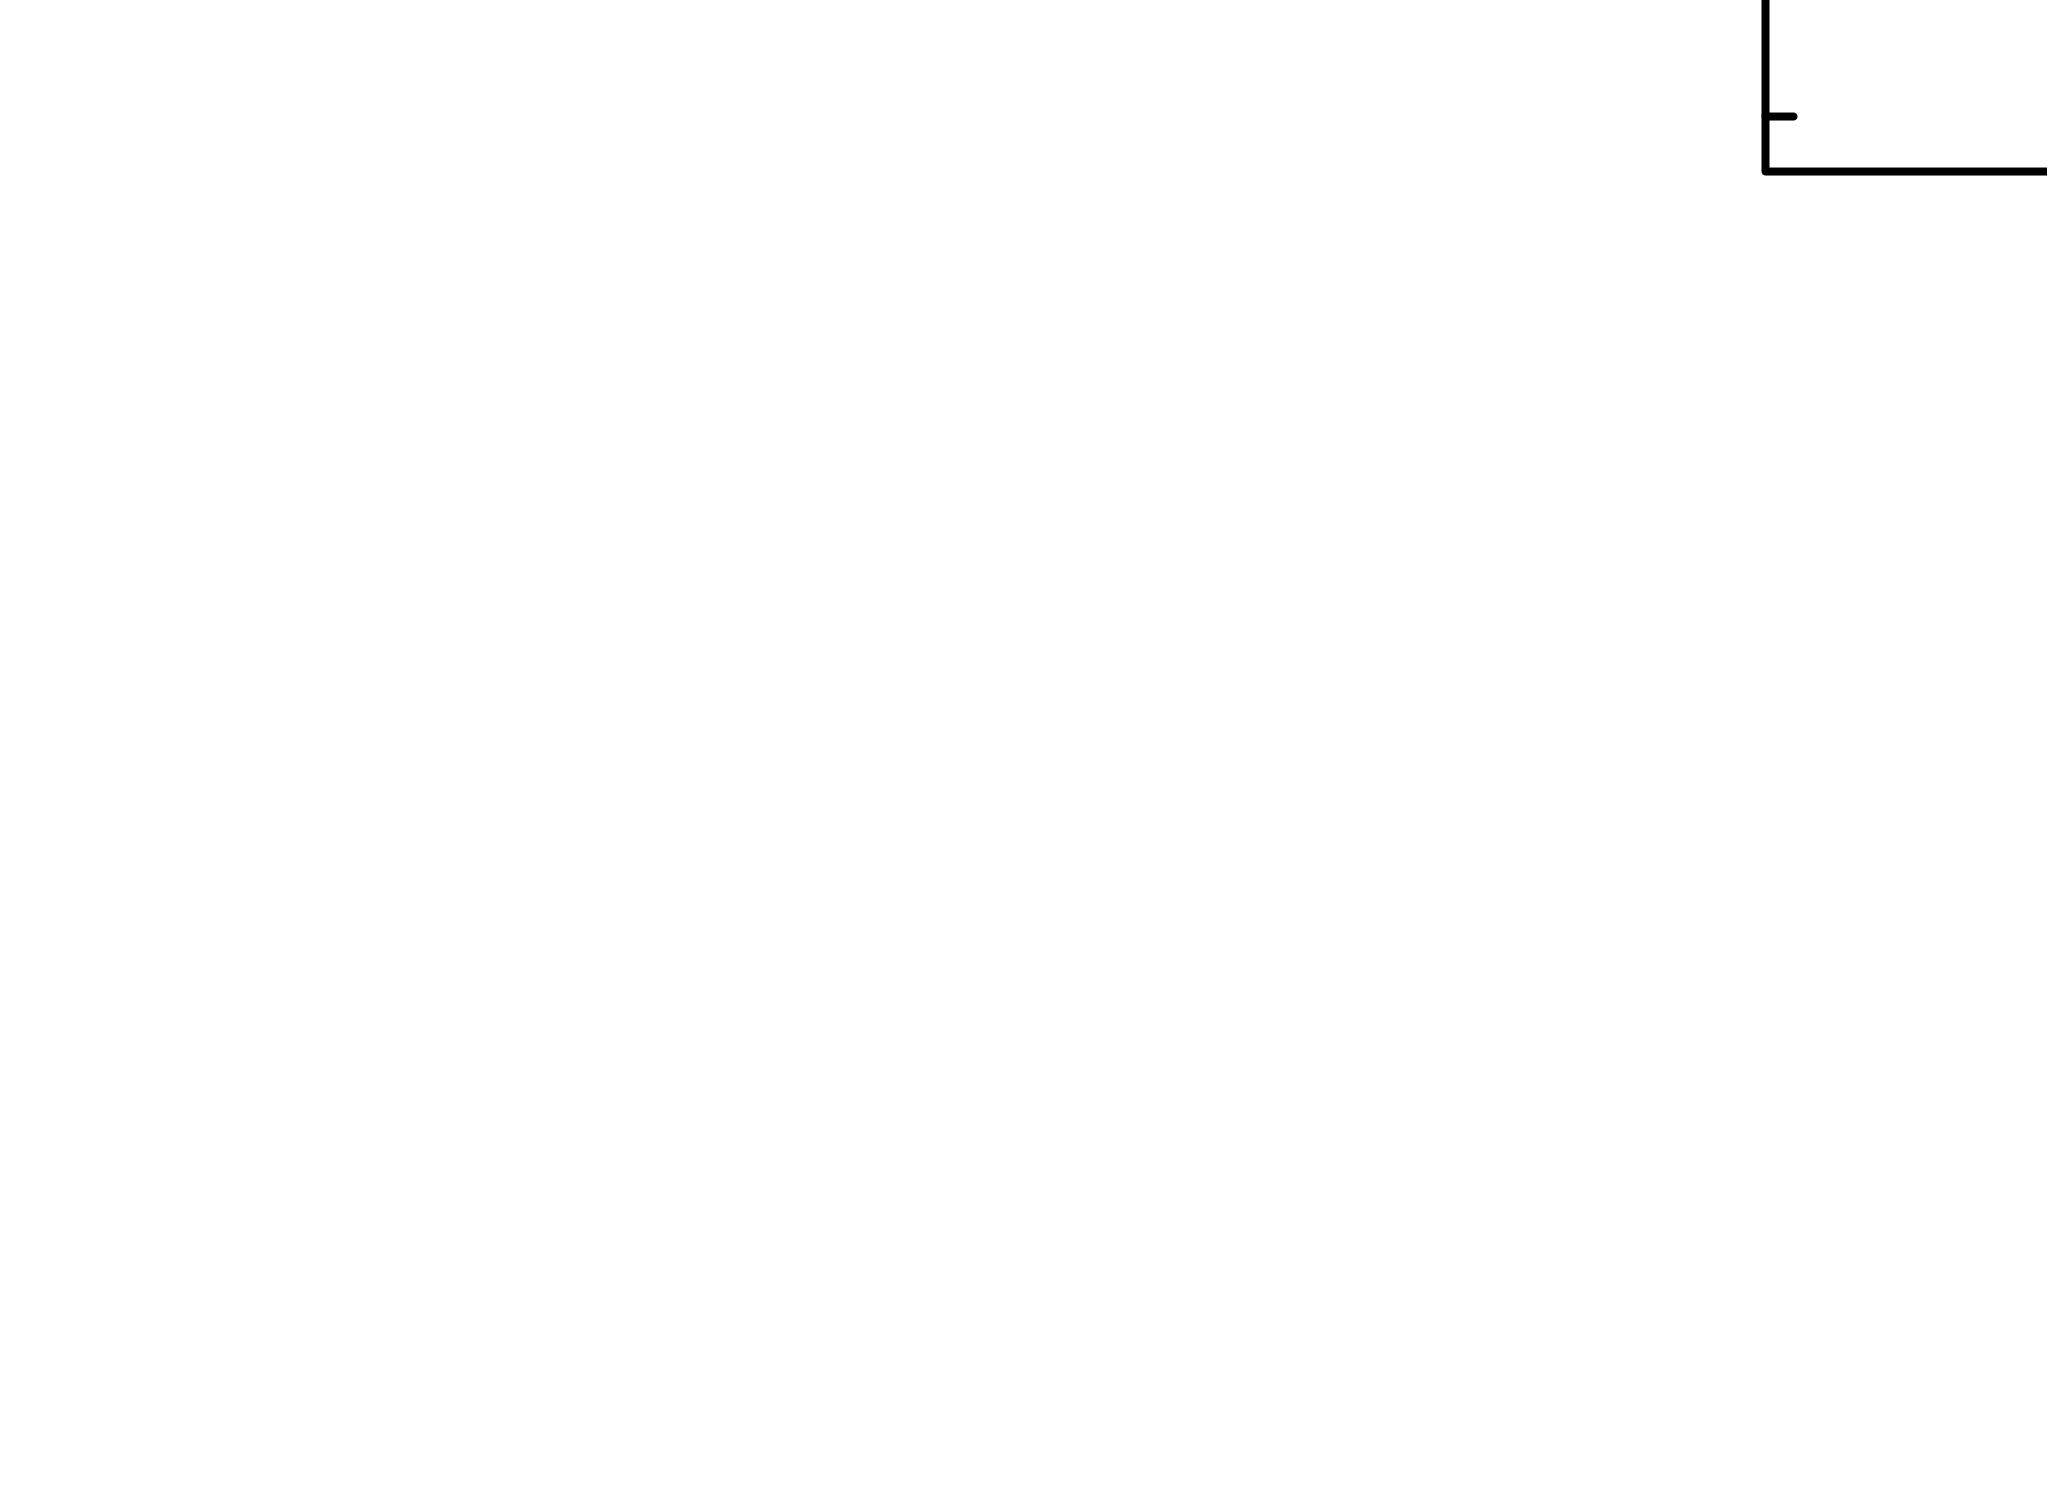

In [17]:
Plot('lda delchi')